# Met Eireann wind speed analysis
### Programming for Data Analytics Project
Author: Vanessa de Oliveira Lyra


For this project, one Met Éireann weather station per county was selected based on windspeed data availability:  
Mace Head (Galway)  
Oak Park (Carlow)  
Shannon Airport (Clare)  
Dublin Airport (Dublin)  
Ballyhaise (Cavan)  
Mullingar (Westmeath)  
Dunsany (Meath)  
Gurteen (Tipperary)  
Malin Head (Donegal)  
Johnstown Castle (Wexford)  
Mount Dillon (Roscommon)  
Valentia Observatory (Kerry)  
Cork Airport (Cork)  
Ireland West Knock Airport (Mayo)  

Weather stations and wind data: https://www.met.ie/climate/available-data/historical-data

Importing libraries

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

Database connection and data fetching

In [89]:
# Connecting to SQLite and creating database file
conn = sqlite3.connect("windspeed.db")

# Reading .csv file into a dataframe using semicolon separator
df_cork = pd.read_csv("datasets/dly3904_cork.csv",skiprows=24)
df_oakpark = pd.read_csv("datasets/dly375_oak_park.csv",skiprows=24)
df_shannon = pd.read_csv("datasets/dly518_shannon.csv",skiprows=24)
df_dublin = pd.read_csv("datasets/dly532_dublin.csv",skiprows=24)
df_ballyhaise = pd.read_csv("datasets/dly675_ballyhaise.csv",skiprows=24)
df_mullingar = pd.read_csv("datasets/dly875_mullingar.csv",skiprows=24)
df_dunsany = pd.read_csv("datasets/dly1375_dunsany.csv",skiprows=24)
df_gurteen = pd.read_csv("datasets/dly1475_gurteen.csv",skiprows=24)
df_malin = pd.read_csv("datasets/dly1575_malin_head.csv",skiprows=24)
df_johnstown = pd.read_csv("datasets/dly1775_johnstown.csv",skiprows=24)
df_mtdillon = pd.read_csv("datasets/dly1975_mt_dillon.csv",skiprows=24)
df_valentia = pd.read_csv("datasets/dly2275_valentia.csv",skiprows=24)
df_mace = pd.read_csv("datasets/dly275_mace_head.csv",skiprows=24)
df_knock = pd.read_csv("datasets/dly4935_knock_airport.csv",skiprows=24)

# Check first 5 lines of data for reference
df_cork.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-jan-1962,0,2.8,1,-2.5,,,8,,999.6,...,0,24,,0,,,,,,
1,02-jan-1962,0,2.8,1,-3.7,,,8,,1005.8,...,0,10,,0,,,,,,
2,03-jan-1962,0,2.3,1,-3.8,,,8,,1007.8,...,0,13,,0,,,,,,
3,04-jan-1962,0,6.6,0,0.6,,,8,,1007.8,...,0,12,,0,,,,,,
4,05-jan-1962,0,9.3,0,0.6,,,8,,1002.2,...,0,29,,0,,,,,,


In [90]:
# Mapping CSV filepaths
weather_files = {
    "cork": "datasets/dly3904_cork.csv",
    "oakpark": "datasets/dly375_oak_park.csv",
    "shannon": "datasets/dly518_shannon.csv",
    "dublin": "datasets/dly532_dublin.csv",
    "ballyhaise": "datasets/dly675_ballyhaise.csv",
    "mullingar": "datasets/dly875_mullingar.csv",
    "dunsany": "datasets/dly1375_dunsany.csv",
    "gurteen": "datasets/dly1475_gurteen.csv",
    "malin": "datasets/dly1575_malin_head.csv",
    "johnstown": "datasets/dly1775_johnstown.csv",
    "mtdillon": "datasets/dly1975_mt_dillon.csv",
    "valentia": "datasets/dly2275_valentia.csv",
    "mace": "datasets/dly275_mace_head.csv",
    "knock": "datasets/dly4935_knock_airport.csv"}

# Dictionary to store data
df_weather = {}

# For loop to read CSV files
for key, value in weather_files.items():
    df_weather[key] = pd.read_csv(value, skiprows=24) 

# Printing head for reference
# print(df_cork.head())

##### References:
Skiprows function: https://stackoverflow.com/questions/20637439/skip-rows-during-csv-import-pandas   
Writing data to SQlite: https://stackoverflow.com/questions/14431646/how-to-write-pandas-dataframe-to-sqlite-with-index  
Importing multiple files: https://stackoverflow.com/questions/56155629/reading-multiple-csv-files-with-different-names-using-python-dictionary-in-a-for

In [91]:
# Print headers for reference
# headers = df.columns.tolist()
# headers

Cleaning up dataset data

In [92]:
# List of columns from dataset to be dropped
drop_columns = ["ind","maxtp","ind.1","mintp","igmin","gmin","ind.2","rain","cbl","ind.3","ind.4","ind.5","sun","dos","soil","pe","evap","smd_wd","smd_md","smd_pd"]

# Loop over all stations
for weather_files, df in df_weather.items():
    # Drop unwanted columns
    df.drop(columns=drop_columns, inplace=True, errors="ignore")
    
    # Normalizing date column
    # Removing white spaces from data using stip()
    # Converting data to datetime, coerce will replace any invalid dates with NaT
    df["date"] = df["date"].astype(str).str.strip()
    df["date"] = pd.to_datetime(df["date"], format="%d-%b-%Y", errors="coerce")
    
    # Convert dataset columns to numeric values using for loop
    for col in ["wdsp", "hm", "hg", "ddhm"]:
        df[col] = pd.to_numeric(df[col], errors="coerce")
    
    # Update the dictionary with the cleaned DataFrame
    df_weather[weather_files] = df
    
    # Writing clean data to database
    df.to_sql(f"{weather_files}_data", conn, if_exists="replace", index=False)

# Example: print Cork head after cleaning
print(df_weather["cork"].head())


        date  wdsp    hm  ddhm  hg
0 1962-01-01   9.2  14.0   340  24
1 1962-01-02   5.9   9.0   340  10
2 1962-01-03   6.7   9.0   360  13
3 1962-01-04   4.5   9.0   310  12
4 1962-01-05  12.7  21.0   240  29


##### References
Remove whitespaces from date: https://medium.com/@amit25173/how-to-remove-whitespace-from-strings-in-pandas-bfd9acdc55f3  
Converting datetime: https://pbpython.com/pandas_dtypes.html  
Convert data to numeric values https://kajodata.com/en/knowledge-base-excel-sql-python/knowledge-base-python-tech-skillshow-pandas-to_numeric-works-in-python-examples-mmk/  
Dates showing as NaT after claening data updated date format from %d-%b-%y to %d-%b-%Y to handle 4-digits year: https://medium.com/@codecorecomputercenter/python-date-formats-a-comprehensive-guide-c6ed0224980b     
For loop convert columns to numeric: https://stackoverflow.com/questions/50456153/use-to-numeric-on-certain-columns-only-in-pandas  

Wind Speed Statistics per location

In [93]:
# List of stations you want to analyze
all_stations = ["cork", "oakpark", "shannon", "dublin", "ballyhaise","mullingar", "dunsany", "gurteen", "malin", "johnstown","mtdillon", "valentia", "mace", "knock"]

# Dictionary to store stats
all_stats = {}

# Loop through stations, retrieving statistics using only relevant .describe() results
for key in all_stations:
    all_stats[key] = df_weather[key][["wdsp"]].describe().loc[["mean", "std", "min", "max"]]

# Concatenating data side by side (axis=1) for better visualization, keys are column/station names
windspeed_stats = pd.concat(all_stats.values(), axis=1, keys=all_stats.keys())

# Removing unecessary header wdsp
windspeed_stats.columns = windspeed_stats.columns.droplevel(1)

# Printing result
print(windspeed_stats)

           cork    oakpark    shannon     dublin  ballyhaise  mullingar  \
mean  10.329621   7.365814   9.580444  10.171263    6.379940   7.261881   
std    4.418126   3.482984   4.446566   4.585331    2.854466   3.580093   
min    0.000000   0.200000   0.000000   0.000000    0.200000   0.000000   
max   35.200000  23.400000  40.800000  35.500000   20.100000  27.900000   

        dunsany    gurteen      malin  johnstown   mtdillon   valentia  \
mean   7.917362   8.197294  15.200186   8.461790   7.032196  10.145187   
std    3.545995   3.596648   6.488982   3.536458   3.184984   4.940014   
min    0.600000   0.200000   0.200000   0.100000   0.200000   0.300000   
max   23.600000  24.300000  44.800000  23.500000  96.800000  38.200000   

           mace      knock  
mean  14.432150   9.442596  
std    6.454098   3.854180  
min    0.100000   0.000000  
max   41.500000  26.800000  


##### References

Filtering df.describe(): https://stackoverflow.com/questions/19124148/modify-output-from-python-pandas-describe  
Concatenating statistics: https://pandas.pydata.org/docs/user_guide/merging.html  
Removing extra column "wdsp" from final table: https://stackoverflow.com/questions/22233488/pandas-drop-a-level-from-a-multi-level-column-index

Monthly windspeed patterns

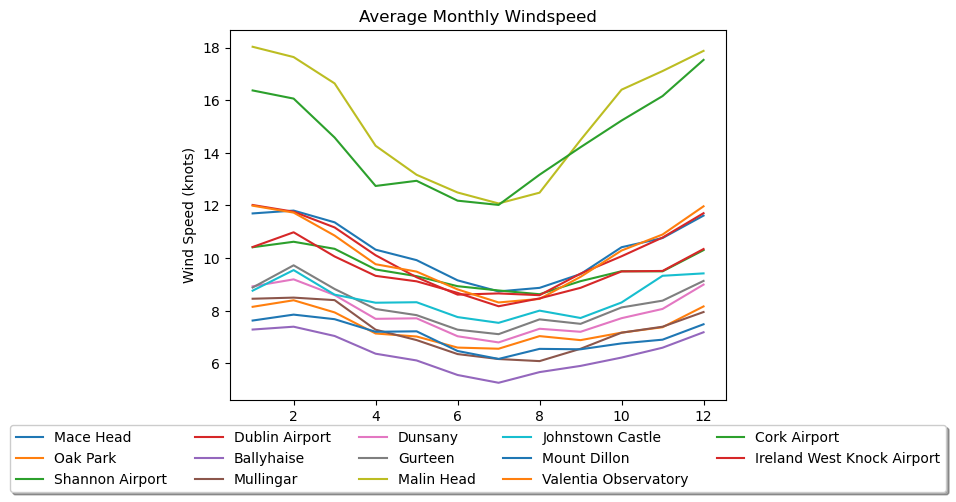

In [ ]:
# List of stations for plot labels
labels = ["Mace Head", "Oak Park", "Shannon Airport", "Dublin Airport","Ballyhaise", "Mullingar", "Dunsany", "Gurteen", "Malin Head","Johnstown Castle", "Mount Dillon", "Valentia Observatory",
          "Cork Airport", "Ireland West Knock Airport"]

# Loop through stations
for i in range(len(all_stations)): #Loop throught the length of the data, number of times to loop through
    station = all_stations[i] # Get the weather station at a determined position, first loop will fetch data from position 0 and so on
    label = labels[i] # Same as above but with labels
    
    # Grouping data and windspeed and calculating men windspeed per month
    monthly_mean = df_weather[station].groupby(df_weather[station]["date"].dt.month)["wdsp"].mean()
    
    # Ploting lines
    plt.plot(monthly_mean, label=label)

    # Printstatement for testing
    # print(monthly_mean)

# Adding legend, title, and axis labels
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=5)
plt.title("Average Monthly Windspeed")
plt.xlabel("Month")
plt.ylabel("Wind Speed (knots)")
plt.show()

##### References
Legend position: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot

Group by year
https://blog.finxter.com/5-best-ways-to-group-pandas-dataframe-by-year/

Yearly windspeed patterns